# Data Exploration & Model Testing (Method 1)

In [ ]:
#Upload data & research data frame
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = r'F:\tstsaeed\ArcelorMittal_project\CoilData_cleaned.csv'
df1 = pd.read_csv(path)
path = r'F:\tstsaeed\ArcelorMittal_project\signal_labels_TR4_new.csv'
df2 = pd.read_csv(path)


In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
print(df2.shape)
print(df1.shape)

(55769, 3)
(55769, 25)


Exploring Data


In [5]:
# main statistics information about each columns
df1.describe()

,Unnamed: 0,coil,furnace Number,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,...,p,s,al,ma,b,n,ti,cr,va,mo
count,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,...,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000,55769.000000
mean,28166.078538,424478.742545,2.368377,11166.995517,110.912622,1260.795862,1165.945113,903.501479,3.562515,554.015044,...,151.160125,80.114454,450.458212,435.582851,2.547867,37.615880,135.971759,562.133390,10.866198,44.040363
std,16363.103129,133313.812642,1.283971,1347.607216,16.743420,290.396810,77.429980,96.160463,1.081599,424.646710,...,116.408660,43.149272,445.484851,437.618650,5.123483,12.397366,217.970218,950.622743,15.866060,145.346782
min,0.000000,10058.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14013.000000,420933.000000,1.000000,10119.000000,99.000000,1092.900000,1155.000000,900.000000,2.820000,353.000000,...,96.000000,48.000000,321.000000,308.000000,1.000000,28.000000,9.000000,205.000000,0.000000,15.000000
50%,28056.000000,454968.000000,3.000000,10507.000000,104.000000,1271.000000,1172.000000,916.000000,3.660000,491.000000,...,126.000000,84.000000,368.000000,353.000000,1.000000,37.000000,15.000000,250.000000,2.000000,20.000000
75%,42207.000000,492598.000000,4.000000,12150.000000,123.000000,1428.600000,1188.000000,928.000000,4.150000,712.000000,...,152.000000,109.000000,453.000000,437.000000,2.000000,46.000000,174.000000,308.000000,18.000000,27.000000
max,56898.000000,533505.000000,4.000000,17362.000000,168.000000,1913.800000,1288.000000,981.000000,8.070000,2409.000000,...,840.000000,289.000000,5986.000000,5881.000000,39.000000,115.000000,1249.000000,6880.000000,150.000000,1200.000000


<AxesSubplot:xlabel='label', ylabel='count'>

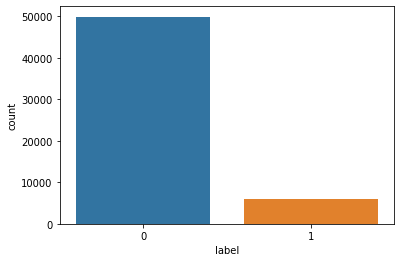

In [6]:
sns.countplot(df2['label'])

In [7]:
df1.columns[3:].to_numpy()

array(['analyse', 'Hardness_1', 'Hardness_2', 'Width',
       'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness',
       'Thickness profile', 'c', 'mn', 'si', 'nb', 'p', 's', 'al', 'ma',
       'b', 'n', 'ti', 'cr', 'va', 'mo'], dtype=object)

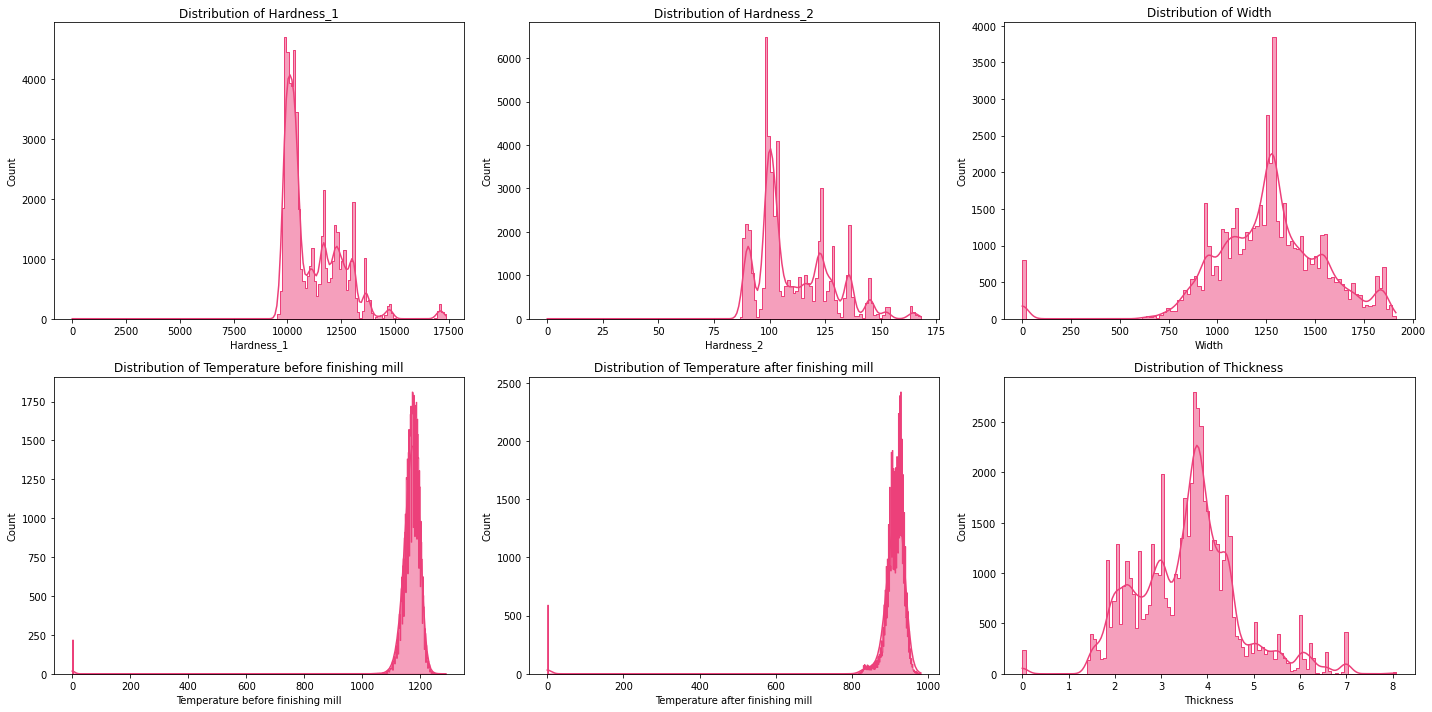

In [8]:
#Distribution of features
feature_cols=df1.columns[4:10].to_numpy()
plt.figure(figsize=(20,10))
for i,col in enumerate(feature_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df1,x=col,kde=True,element='step',color='#EC407A')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Selecting Features and Resampling

In [3]:

import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
#X=pd.concat([df1.iloc[:,3:10], df1.iloc[:,11:14], df1.iloc[:,15:19], df1.iloc[:,20:25]],axis=1)
X=pd.concat([df1.iloc[:,4:10], df1.iloc[:,11:14], df1.iloc[:,15:19], df1.iloc[:,20:25]],axis=1)

#X=pd.concat([df1.iloc[:,4:10], df1.iloc[:,11:14]],axis=1)
y=df2.iloc[:,1]

#UNDERSAMPLING

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)
X.columns.to_numpy()
#scaler = MinMaxScaler()
 
#X = scaler.fit_transform(X.to_numpy())
#X = (X-X.min())/(X.max()-X.min())
#df1.iloc[:,12:]




(11808, 18)
(11808,)


array(['Hardness_1', 'Hardness_2', 'Width',
       'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness', 'c', 'mn', 'si',
       'p', 's', 'al', 'ma', 'n', 'ti', 'cr', 'va', 'mo'], dtype=object)

Comparing Feaatures of Coils with and without Constriction

In [5]:
## Split Data
x0 = X_resampled[y_resampled==0]
x1 = X_resampled[y_resampled==1]
x1.shape


(5904, 18)

Visualize Features Based on Constrinctin

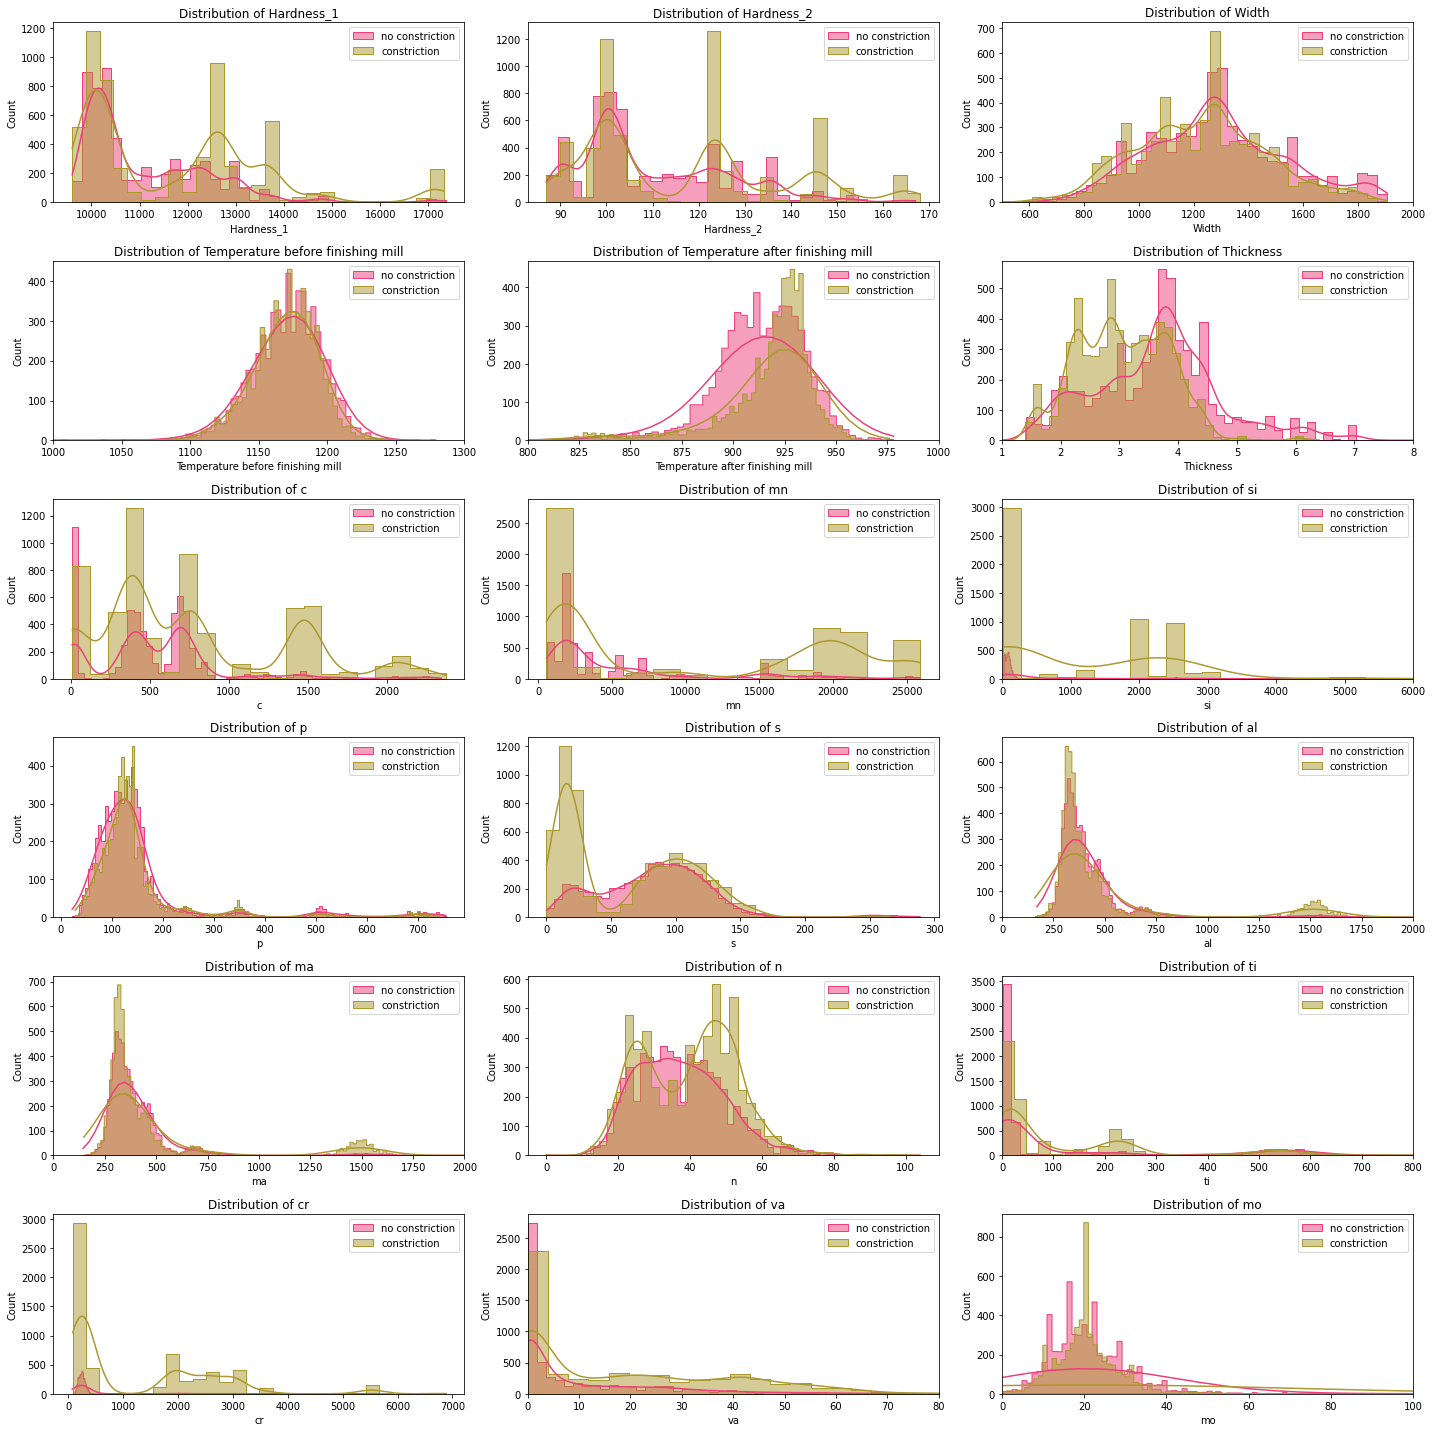

In [9]:
feature_cols=x0.columns[0:18].to_numpy()
plt.figure(figsize=(20,20))
for i,col in enumerate(feature_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=x0,x=col,kde=True,element='step',color='#EC407A')
    sns.histplot(data=x1,x=col,kde=True,element='step',color='#AB982E')
    plt.legend(labels=['no constriction','_nolegend_','constriction','_nolegend_'])
    plt.title(f"Distribution of {col}")
    if(col=='Temperature before finishing mill'):
        plt.xlim([1000, 1300])
    if(col=='Temperature after finishing mill'):
        plt.xlim([800, 1000])
    if(col=='Width'):
        plt.xlim([500, 2000])
    if(col=='Thickness'):
        plt.xlim([1, 8])
    if(col=='si'):
        plt.xlim([0, 6000])
    if(col=='al'):
        plt.xlim([0, 2000])
    if(col=='ma'):
        plt.xlim([0, 2000])
    if(col=='ti'):
        plt.xlim([0, 800])
    if(col=='va'):
        plt.xlim([0, 80])
    if(col=='mo'):
        plt.xlim([0, 100])
    

plt.tight_layout()
plt.show()

In [12]:
# Split dataframe into random train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled,
    y_resampled, 
    test_size = 0.2,
    random_state=35
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(9446, 18) (9446,)
(2362, 18) (2362,)


Decision Tree classification

In [13]:
#Decision Tree classification
decision_tree = DecisionTreeClassifier() 
decision_tree = decision_tree.fit(X_train, Y_train)

acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

77.94

In [14]:
# Classification Report on train data set
from sklearn.metrics import classification_report, confusion_matrix
y_pred_tst = decision_tree.predict(X_test)
print('Classification Report on Train Data','\n\n',classification_report(Y_test,y_pred_tst))

Classification Report on Train Data 

               precision    recall  f1-score   support

           0       0.76      0.79      0.78      1152
           1       0.79      0.77      0.78      1210

    accuracy                           0.78      2362
   macro avg       0.78      0.78      0.78      2362
weighted avg       0.78      0.78      0.78      2362



Evaluation of the Model

Score : 0.779424216765453

{'0': {'precision': 0.7644593461860855, 'recall': 0.7916666666666666, 'f1-score': 0.7778251599147121, 'support': 1152}, '1': {'precision': 0.7946963216424294, 'recall': 0.7677685950413223, 'f1-score': 0.7810004203446825, 'support': 1210}, 'accuracy': 0.779424216765453, 'macro avg': {'precision': 0.7795778339142574, 'recall': 0.7797176308539945, 'f1-score': 0.7794127901296973, 'support': 2362}, 'weighted avg': {'precision': 0.7799490753572015, 'recall': 0.779424216765453, 'f1-score': 0.7794517751222753, 'support': 2362}}


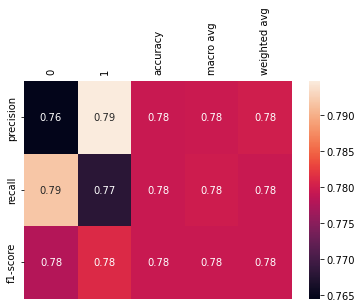

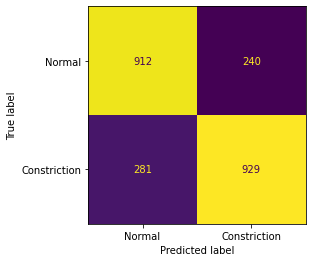

In [15]:

# Evaluate your model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

rep = classification_report(Y_test,y_pred_tst,output_dict=True)
print(f"Score : {decision_tree.score(X_test, Y_test)}\n")
print(rep)
plt.tick_params(labelbottom = False, bottom=False, labeltop=True)
sns.heatmap(pd.DataFrame(rep).iloc[:-1, :], annot=True)
cm = confusion_matrix(Y_test,y_pred_tst)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal','Constriction'])
cmd.plot(colorbar=False)



RandomForest classification

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


#X, y = make_classification(n_samples=44615, n_features=9, n_informative=9, n_redundant=0, random_state=0, shuffle=False)
rf = RandomForestClassifier(max_depth=30, random_state=0, class_weight={0:1,1:20})
rf.fit(X_train, Y_train)
rf_predict=rf.predict(X_test)

In [17]:
#confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

rf_conf_matrix = confusion_matrix(Y_test, rf_predict)
rf_acc_score = accuracy_score(Y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[ 901  251]
 [ 178 1032]]
81.83742591024556


Evaluation of the Model

Score : 0.8183742591024555

{'0': {'precision': 0.835032437442076, 'recall': 0.7821180555555556, 'f1-score': 0.8077095472882114, 'support': 1152}, '1': {'precision': 0.8043647700701481, 'recall': 0.8528925619834711, 'f1-score': 0.8279181708784596, 'support': 1210}, 'accuracy': 0.8183742591024555, 'macro avg': {'precision': 0.819698603756112, 'recall': 0.8175053087695133, 'f1-score': 0.8178138590833355, 'support': 2362}, 'weighted avg': {'precision': 0.819322074393798, 'recall': 0.8183742591024555, 'f1-score': 0.8180619751223351, 'support': 2362}}


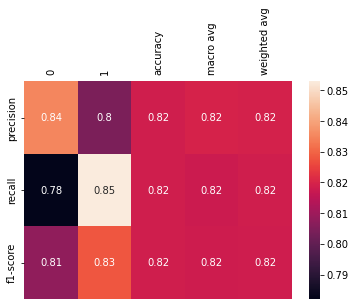

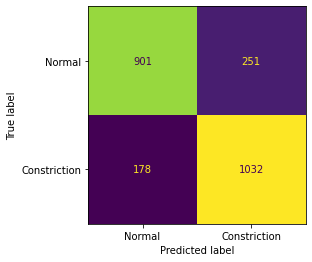

In [18]:


from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

rep = classification_report(Y_test,rf_predict,output_dict=True)
print(f"Score : {rf.score(X_test, Y_test)}\n")
print(rep)
plt.tick_params(labelbottom = False, bottom=False, labeltop=True)
sns.heatmap(pd.DataFrame(rep).iloc[:-1, :], annot=True)
cm = confusion_matrix(Y_test,rf_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal','Constriction'])
cmd.plot(colorbar=False)


SVM calssification

In [19]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

rf_conf_matrix = confusion_matrix(Y_test, y_pred)
rf_acc_score = accuracy_score(Y_test, y_pred)

print(rf_conf_matrix)
print(rf_acc_score*100)